In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

In [2]:
dataset_path = '/content/drive/MyDrive/Online Retail.xlsx'
df = pd.read_excel(dataset_path)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
#Extract extraneaous stock codes. These codes appear to be postage, discounts,
# samples, gifts, etc are are not to be included as mechandise sold.

In [7]:
df["StockCode"].unique().tolist()

['85123A',
 71053,
 '84406B',
 '84029G',
 '84029E',
 22752,
 21730,
 22633,
 22632,
 84879,
 22745,
 22748,
 22749,
 22310,
 84969,
 22623,
 22622,
 21754,
 21755,
 21777,
 48187,
 22960,
 22913,
 22912,
 22914,
 21756,
 22728,
 22727,
 22726,
 21724,
 21883,
 10002,
 21791,
 21035,
 22326,
 22629,
 22659,
 22631,
 22661,
 21731,
 22900,
 21913,
 22540,
 22544,
 22492,
 'POST',
 22086,
 20679,
 37370,
 21871,
 21071,
 21068,
 82483,
 82486,
 82482,
 '82494L',
 21258,
 22114,
 21733,
 22386,
 '85099C',
 21033,
 20723,
 '84997B',
 '84997C',
 21094,
 20725,
 21559,
 22352,
 21212,
 21975,
 21977,
 84991,
 '84519A',
 '85183B',
 '85071B',
 21931,
 21929,
 22961,
 22139,
 84854,
 22411,
 82567,
 21672,
 22774,
 22771,
 71270,
 22262,
 22637,
 21934,
 21169,
 21166,
 21175,
 '37444A',
 '37444C',
 22083,
 '84971S',
 47580,
 22261,
 84832,
 22644,
 21533,
 21557,
 '15056BL',
 '15056N',
 22646,
 22176,
 22438,
 22778,
 22719,
 21523,
 'D',
 21912,
 21832,
 22379,
 22381,
 22798,
 22926,
 22839,


In [8]:
#Stock Codes contain a mix of strings and integers

In [9]:
# Convert the "StockCode" column to strings
df['StockCode'] = df['StockCode'].astype(str)

# Print the updated dataframe
df['StockCode'].dtypes


dtype('O')

In [10]:
df["StockCode"].unique().tolist()

['85123A',
 '71053',
 '84406B',
 '84029G',
 '84029E',
 '22752',
 '21730',
 '22633',
 '22632',
 '84879',
 '22745',
 '22748',
 '22749',
 '22310',
 '84969',
 '22623',
 '22622',
 '21754',
 '21755',
 '21777',
 '48187',
 '22960',
 '22913',
 '22912',
 '22914',
 '21756',
 '22728',
 '22727',
 '22726',
 '21724',
 '21883',
 '10002',
 '21791',
 '21035',
 '22326',
 '22629',
 '22659',
 '22631',
 '22661',
 '21731',
 '22900',
 '21913',
 '22540',
 '22544',
 '22492',
 'POST',
 '22086',
 '20679',
 '37370',
 '21871',
 '21071',
 '21068',
 '82483',
 '82486',
 '82482',
 '82494L',
 '21258',
 '22114',
 '21733',
 '22386',
 '85099C',
 '21033',
 '20723',
 '84997B',
 '84997C',
 '21094',
 '20725',
 '21559',
 '22352',
 '21212',
 '21975',
 '21977',
 '84991',
 '84519A',
 '85183B',
 '85071B',
 '21931',
 '21929',
 '22961',
 '22139',
 '84854',
 '22411',
 '82567',
 '21672',
 '22774',
 '22771',
 '71270',
 '22262',
 '22637',
 '21934',
 '21169',
 '21166',
 '21175',
 '37444A',
 '37444C',
 '22083',
 '84971S',
 '47580',
 '22261

In [11]:
import re

# Define the regex pattern for the desired format
pattern = r'^\d{5}(\d|[a-zA-Z])?$'

# Filter the dataframe based on the pattern
invalid_codes = df[~df['StockCode'].astype(str).str.match(pattern)]['StockCode'].unique()

# Print the list of invalid codes
print(invalid_codes)


['POST' '15056BL' 'D' 'C2' 'DOT' 'M' 'BANK CHARGES' '15056bl' 'S'
 'AMAZONFEE' 'DCGS0076' 'DCGS0003' 'gift_0001_40' 'DCGS0070' 'm'
 'gift_0001_50' 'gift_0001_30' 'gift_0001_20' 'DCGS0055' 'DCGS0072'
 'DCGS0074' 'DCGS0069' 'DCGS0057' 'DCGSSBOY' 'DCGSSGIRL' 'gift_0001_10'
 'PADS' 'DCGS0004' 'DCGS0073' 'DCGS0071' 'DCGS0068' 'DCGS0067' 'DCGS0066P'
 'B' 'CRUK' '79323GR' '79323LP']


In [12]:
# Research descriptions and determine which are still relevant

In [13]:
# Specify the stock codes you want to select
selected_stock_codes = ['POST','15056BL','D','C2','DOT','M','BANK CHARGES','15056bl','S'
 'AMAZONFEE' ,'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070' ,'m'
 'gift_0001_50' ,'gift_0001_30', 'gift_0001_20', 'DCGS0055', 'DCGS0072',
 'DCGS0074' ,'DCGS0069', 'DCGS0057' ,'DCGSSBOY' ,'DCGSSGIRL' ,'gift_0001_10',
 'PADS', 'DCGS0004' ,'DCGS0073', 'DCGS0071' ,'DCGS0068' ,'DCGS0067' ,'DCGS0066P',
 'B' ,'CRUK' ,'79323GR', '79323LP']

# Filter the data frame to include only the selected stock codes
selected_rows = df[df['StockCode'].isin(selected_stock_codes)]

# Get unique stock codes and their descriptions
unique_codes = selected_rows['StockCode'].unique()


# Print the unique stock codes and their corresponding descriptions
for code in unique_codes:
    description = selected_rows.loc[selected_rows['StockCode'] == code, 'Description'].iloc[0]
    print(f"Stock Code: {code} - Description: {description}")

Stock Code: POST - Description: POSTAGE
Stock Code: 15056BL - Description: EDWARDIAN PARASOL BLACK
Stock Code: D - Description: Discount
Stock Code: C2 - Description: CARRIAGE
Stock Code: DOT - Description: DOTCOM POSTAGE
Stock Code: M - Description: Manual
Stock Code: BANK CHARGES - Description: Bank Charges
Stock Code: 15056bl - Description: EDWARDIAN PARASOL BLACK
Stock Code: DCGS0076 - Description: SUNJAR LED NIGHT NIGHT LIGHT
Stock Code: DCGS0003 - Description: BOXED GLASS ASHTRAY
Stock Code: gift_0001_40 - Description: Dotcomgiftshop Gift Voucher £40.00
Stock Code: DCGS0070 - Description: CAMOUFLAGE DOG COLLAR
Stock Code: gift_0001_30 - Description: Dotcomgiftshop Gift Voucher £30.00
Stock Code: gift_0001_20 - Description: Dotcomgiftshop Gift Voucher £20.00
Stock Code: DCGS0055 - Description: nan
Stock Code: DCGS0072 - Description: nan
Stock Code: DCGS0074 - Description: nan
Stock Code: DCGS0069 - Description: OOH LA LA DOGS COLLAR
Stock Code: DCGS0057 - Description: nan
Stock Co

In [14]:
# Retain 15056BL, 15056bl, DCGS0076, DCGS0003,DCGS0070,DCGS0069, DCGSSBOY, DCGSSGIRL, DCGS0004

In [15]:
#Take invalid stock codes and store them in a separate dataframe

In [16]:
invalid_codes_reviewed = ['POST','D','C2','DOT','M','BANK CHARGES','S','AMAZONFEE' , 'gift_0001_40','m',
 'gift_0001_50' ,'gift_0001_30', 'gift_0001_20', 'DCGS0055', 'DCGS0072',
 'DCGS0074', 'DCGS0057' ,'DCGSSBOY' ,'DCGSSGIRL' ,'gift_0001_10',
 'PADS', 'DCGS0073', 'DCGS0071' ,'DCGS0068' ,'DCGS0067' ,'DCGS0066P',
 'B' ,'CRUK' ,'79323GR', '79323LP']

In [17]:
invalid_df = df[df['StockCode'].isin(invalid_codes_reviewed)]


In [18]:
print(invalid_df)

       InvoiceNo StockCode     Description  Quantity         InvoiceDate  \
45        536370      POST         POSTAGE         3 2010-12-01 08:45:00   
141      C536379         D        Discount        -1 2010-12-01 09:41:00   
386       536403      POST         POSTAGE         1 2010-12-01 11:27:00   
1123      536527      POST         POSTAGE         1 2010-12-01 13:04:00   
1423      536540        C2        CARRIAGE         1 2010-12-01 14:05:00   
...          ...       ...             ...       ...                 ...   
541540    581498       DOT  DOTCOM POSTAGE         1 2011-12-09 10:26:00   
541541   C581499         M          Manual        -1 2011-12-09 10:28:00   
541730    581570      POST         POSTAGE         1 2011-12-09 11:59:00   
541767    581574      POST         POSTAGE         2 2011-12-09 12:09:00   
541768    581578      POST         POSTAGE         3 2011-12-09 12:16:00   

        UnitPrice  CustomerID         Country  
45          18.00     12583.0          

In [19]:
df.shape

(541909, 8)

In [20]:
#Create new df containing only valid codes.
#Negate (~) the invalid codes to remove rows
df2 = df[~df['StockCode'].isin(invalid_codes_reviewed)]

In [21]:
df2.shape

(538924, 8)

In [22]:
#df = Original data frame
#df2 = Data frame with relevant "valid" StockCodes
#invalid_df = Saved data from irrelevant StockCodes

In [23]:
#Fill missing descriptions

In [24]:
df2.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1440
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134015
Country             0
dtype: int64

In [25]:
# Fill missing descriptions with corresponding stock codes using .loc
df2.loc[df2['Description'].isnull(), 'Description'] = df2.loc[df2['Description'].isnull(), 'StockCode']

df2.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134015
Country             0
dtype: int64

In [26]:
#drop missing Customer IDs as we cannot predict

In [27]:
df2.dropna(inplace=True)

<ipython-input-27-f66736151044>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


In [28]:
df2.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [29]:
# Drop columns with cancelled orders -- Invoice numbers with 'c' in the beginning

# Convert InvoiceNo to string to perform boolean mask
df2['InvoiceNo'] = df2['InvoiceNo'].astype(str)

# Identify rows that start with 'c'
mask = df2['InvoiceNo'].str.startswith('c')

# Drop rows that start with 'c'
df2 = df2[~mask]

<ipython-input-29-8ec63e66cfe5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['InvoiceNo'] = df2['InvoiceNo'].astype(str)


In [30]:
df2.shape

(404909, 8)

In [31]:
#Convert InvoiceDate column to YYYY-MM format

df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'], format='%m/%d/%y %H:%M')
df2['year_month'] = df2['InvoiceDate'].dt.strftime('%Y-%m')

df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12


In [32]:
df2.describe()

,Quantity,UnitPrice,CustomerID
count,404909.000000,404909.000000,404909.000000
mean,12.105799,2.901129,15295.168304
std,249.237543,4.430846,1710.424057
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,5.000000,1.950000,15159.000000
75%,12.000000,3.750000,16794.000000
max,80995.000000,649.500000,18287.000000


In [33]:
duplicates = df2.duplicated()
has_duplicates = duplicates.any()
print(has_duplicates)

True


In [34]:
duplicates_review = df2.duplicated()
duplicate_records = df2[duplicates_review]
print(duplicate_records)

       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country year_month  
517    2010-12-01 11

In [35]:
#No duplicate records

Cohort Analysis

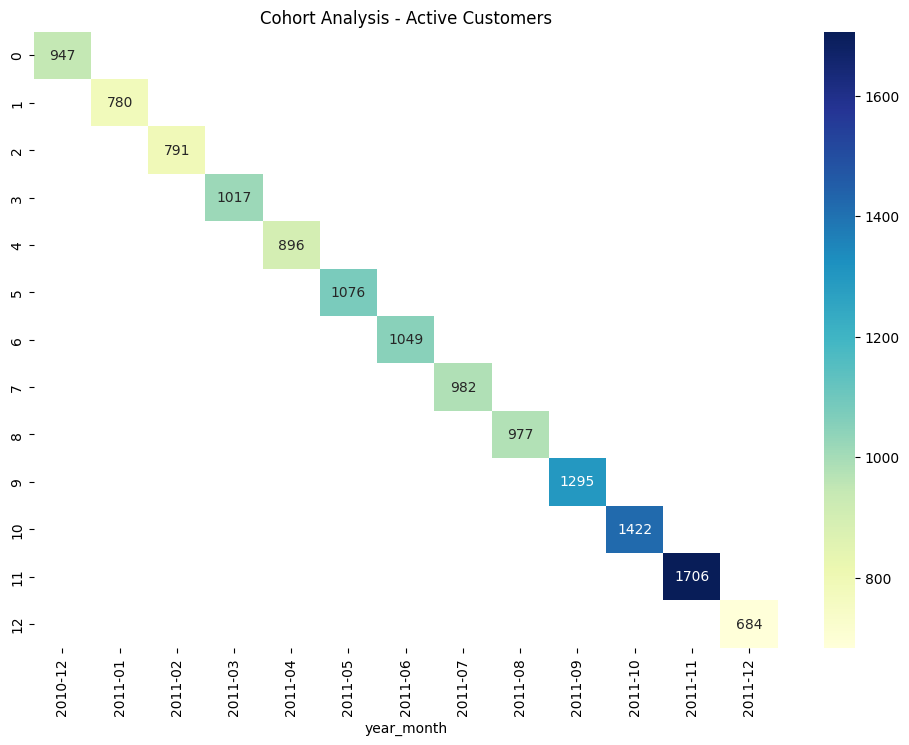

In [36]:
# Group the data by the 'year_month' column and calculate the number of unique active customers for each month
cohorts = df2.groupby(['year_month']).agg({'CustomerID': pd.Series.nunique}).reset_index()

# Create a pivot table to visualize the active customers in each cohort over time
cohort_pivot = cohorts.pivot(index=None, columns='year_month', values='CustomerID')

# Plot the cohort analysis using a heatmap
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis - Active Customers')
sns.heatmap(data=cohort_pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.show()

In [37]:
# Group the data by cohort and month and calculate the number of customers for each combination
cohorts = df2.groupby(['year_month']).agg({'CustomerID': pd.Series.nunique}).reset_index()

# Display the cohorts DataFrame
print(cohorts)

   year_month  CustomerID
0     2010-12         947
1     2011-01         780
2     2011-02         791
3     2011-03        1017
4     2011-04         896
5     2011-05        1076
6     2011-06        1049
7     2011-07         982
8     2011-08         977
9     2011-09        1295
10    2011-10        1422
11    2011-11        1706
12    2011-12         684


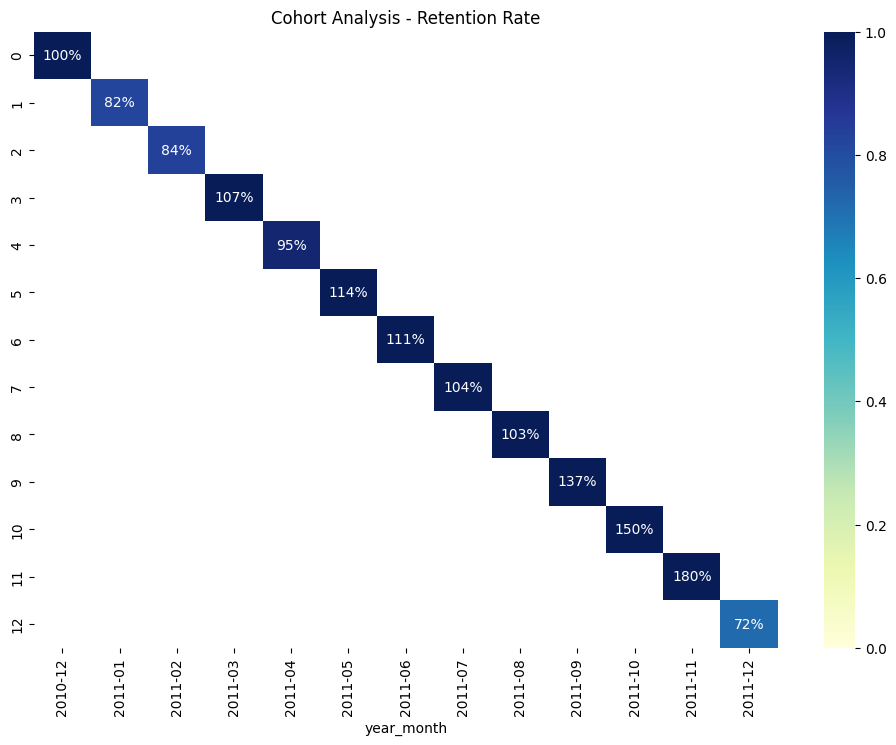

In [38]:
# Calculate the cohort size for the initial month
initial_month_cohort_size = cohorts.iloc[0]['CustomerID']

# Calculate the retention rate by dividing the number of active customers for each month by the initial cohort size
cohorts['RetentionRate'] = cohorts['CustomerID'] / initial_month_cohort_size

# Create a pivot table to visualize the retention rate over time
retention_pivot = cohorts.pivot(index=None, columns='year_month', values='RetentionRate')

# Plot the retention rate analysis using a heatmap
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data=retention_pivot, annot=True, fmt='.0%', cmap='YlGnBu', vmin=0, vmax=1)
plt.show()

In [39]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12


In [40]:
# 1 year time period

# Define the reference date as the maximum date in the dataset
reference_date = df2['InvoiceDate'].max()

# Calculate recency for each customer
df2['recency'] = (reference_date - df2['InvoiceDate']).dt.days

# Display the resulting DataFrame
print(df2[['CustomerID', 'InvoiceDate', 'recency']])

        CustomerID         InvoiceDate  recency
0          17850.0 2010-12-01 08:26:00      373
1          17850.0 2010-12-01 08:26:00      373
2          17850.0 2010-12-01 08:26:00      373
3          17850.0 2010-12-01 08:26:00      373
4          17850.0 2010-12-01 08:26:00      373
...            ...                 ...      ...
541904     12680.0 2011-12-09 12:50:00        0
541905     12680.0 2011-12-09 12:50:00        0
541906     12680.0 2011-12-09 12:50:00        0
541907     12680.0 2011-12-09 12:50:00        0
541908     12680.0 2011-12-09 12:50:00        0

[404909 rows x 3 columns]


In [41]:
#Frequency Value
# Set the chosen time period
time_period = pd.DateOffset(years=1)

# Filter the purchases within the chosen time period
df_within_period = df2[df2['InvoiceDate'] >= df2['InvoiceDate'].max() - time_period]

# Calculate the frequency value for each customer
frequency = df_within_period.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Display DataFrame
print(frequency)

      CustomerID  InvoiceNo
0        12346.0          2
1        12347.0          6
2        12348.0          4
3        12349.0          1
4        12350.0          1
...          ...        ...
4290     18280.0          1
4291     18281.0          1
4292     18282.0          3
4293     18283.0         16
4294     18287.0          3

[4295 rows x 2 columns]


In [42]:
# Assign the frequency values to a new column in df
df2['Frequency'] = df2['CustomerID'].map(frequency.set_index('CustomerID')['InvoiceNo'])

# Display DataFrame
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year_month,recency,Frequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,373,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,373,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,373,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,373,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,373,1.0


In [43]:
# Calculate the monetary value for each customer
df_within_period['total_amount'] = df_within_period['Quantity'] * df_within_period['UnitPrice']
monetary = df_within_period.groupby('CustomerID')['total_amount'].sum().reset_index()

# Display the resulting DataFrame
print(monetary)

      CustomerID  total_amount
0        12346.0          0.00
1        12347.0       3598.21
2        12348.0       1437.24
3        12349.0       1457.55
4        12350.0        294.40
...          ...           ...
4290     18280.0        180.60
4291     18281.0         80.82
4292     18282.0        176.60
4293     18283.0       2088.93
4294     18287.0       1837.28

[4295 rows x 2 columns]


<ipython-input-43-953fa8114707>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_within_period['total_amount'] = df_within_period['Quantity'] * df_within_period['UnitPrice']


In [44]:
print(monetary['total_amount'].describe())

count      4295.000000
mean       1862.606740
std        8047.958718
min       -1573.650000
25%         291.205000
50%         640.830000
75%        1557.020000
max      278778.020000
Name: total_amount, dtype: float64


In [45]:
# Sort the DataFrame by monetary values in descending order
sorted_monetary = monetary.sort_values(by='total_amount', ascending=False)

# Print the sorted DataFrame
print(sorted_monetary)

      CustomerID  total_amount
1677     14646.0     278778.02
4158     18102.0     233736.93
3696     17450.0     187706.69
1865     14911.0     124620.55
55       12415.0     123638.18
...          ...           ...
2633     15973.0       -208.05
261      12666.0       -227.44
3191     16742.0       -464.90
2537     15823.0       -811.86
330      12755.0      -1573.65

[4295 rows x 2 columns]


In [46]:
# Calculate monetary value
df2['Monetary'] = df2['Quantity'] * df2['UnitPrice']

In [47]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year_month,recency,Frequency,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,373,1.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,373,1.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,373,1.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,373,1.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,373,1.0,20.34


In [48]:
missing_frequency_rows = df2[df2['Frequency'].isnull()]

# Display a few rows with missing values in the frequency column
print(missing_frequency_rows.head())

    InvoiceNo StockCode                          Description  Quantity  \
155    536384     82484    WOOD BLACK BOARD ANT WHITE FINISH         3   
156    536384     84755  COLOUR GLASS T-LIGHT HOLDER HANGING        48   
157    536384     22464          HANGING METAL HEART LANTERN        12   
158    536384     21324         HANGING MEDINA LANTERN SMALL         6   
159    536384     22457      NATURAL SLATE HEART CHALKBOARD         12   

            InvoiceDate  UnitPrice  CustomerID         Country year_month  \
155 2010-12-01 09:53:00       6.45     18074.0  United Kingdom    2010-12   
156 2010-12-01 09:53:00       0.65     18074.0  United Kingdom    2010-12   
157 2010-12-01 09:53:00       1.65     18074.0  United Kingdom    2010-12   
158 2010-12-01 09:53:00       2.95     18074.0  United Kingdom    2010-12   
159 2010-12-01 09:53:00       2.95     18074.0  United Kingdom    2010-12   

     recency  Frequency  Monetary  
155      373        NaN     19.35  
156      373        

In [49]:
# Fill null values in the 'frequency' column with 1
df2['Frequency'].fillna(1.0, inplace=True)

In [50]:
null_values_frequency = df2['Frequency'].isnull().sum()

# Display the count of null values
print("Null values in 'Frequency':", null_values_frequency)

Null values in 'Frequency': 0


In [51]:
# Assign scores based on quartiles
df2['R'] = pd.qcut(df2['recency'], q=[0, 0.25, 0.5, 0.75, 1], labels=[4, 3, 2, 1])
df2['F'] = pd.qcut(df2['Frequency'], q=[0, 0.25, 0.5, 0.75, 1], labels=[1, 2, 3, 4])
df2['M'] = pd.qcut(df2['Monetary'], q=[0, 0.25, 0.5, 0.75, 1], labels=[1, 2, 3, 4])

# Combine the RFM scores into a single RFM score column
df2['RFM Score'] = df2['R'].astype(str) + df2['F'].astype(str) + df2['M'].astype(str)

# Display the updated RFM DataFrame
print(df2)


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country year_mont

In [52]:
# Group the data by RFM scores and calculate aggregate metrics
rfm_summary = df2.groupby('RFM Score').agg({
    'recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).reset_index()

# Sort the summary by RFM score in ascending order
rfm_summary = rfm_summary.sort_values('RFM Score')

# Comment on the findings
for index, row in rfm_summary.iterrows():
    rfm_score = row['RFM Score']
    recency_mean = row['recency']
    frequency_mean = row['Frequency']
    monetary_mean = row['Monetary']
    customer_count = row['CustomerID']

    print(f"RFM Score: {rfm_score}")
    print(f"   - Average Recency: {recency_mean}")
    print(f"   - Average Frequency: {frequency_mean}")
    print(f"   - Average Monetary: {monetary_mean}")
    print(f"   - Customer Count: {customer_count}")
    print("")


RFM Score: 111
   - Average Recency: 320.37790097988653
   - Average Frequency: 2.3250386797318203
   - Average Monetary: -9.572408457968026
   - Customer Count: 7756

RFM Score: 112
   - Average Recency: 315.08864878937777
   - Average Frequency: 2.3392345743296015
   - Average Monetary: 7.56154386878417
   - Customer Count: 7682

RFM Score: 113
   - Average Recency: 308.1232761722029
   - Average Frequency: 2.4258304353039932
   - Average Monetary: 15.387516488787625
   - Customer Count: 8339

RFM Score: 114
   - Average Recency: 310.95543175487467
   - Average Frequency: 2.4284470752089136
   - Average Monetary: 63.28251915041783
   - Customer Count: 5744

RFM Score: 121
   - Average Recency: 306.7928782132322
   - Average Frequency: 6.523598820058997
   - Average Monetary: 0.047848714707121785
   - Customer Count: 4746

RFM Score: 122
   - Average Recency: 308.71576943050025
   - Average Frequency: 6.340488142634586
   - Average Monetary: 7.540100398130517
   - Customer Count: 5777

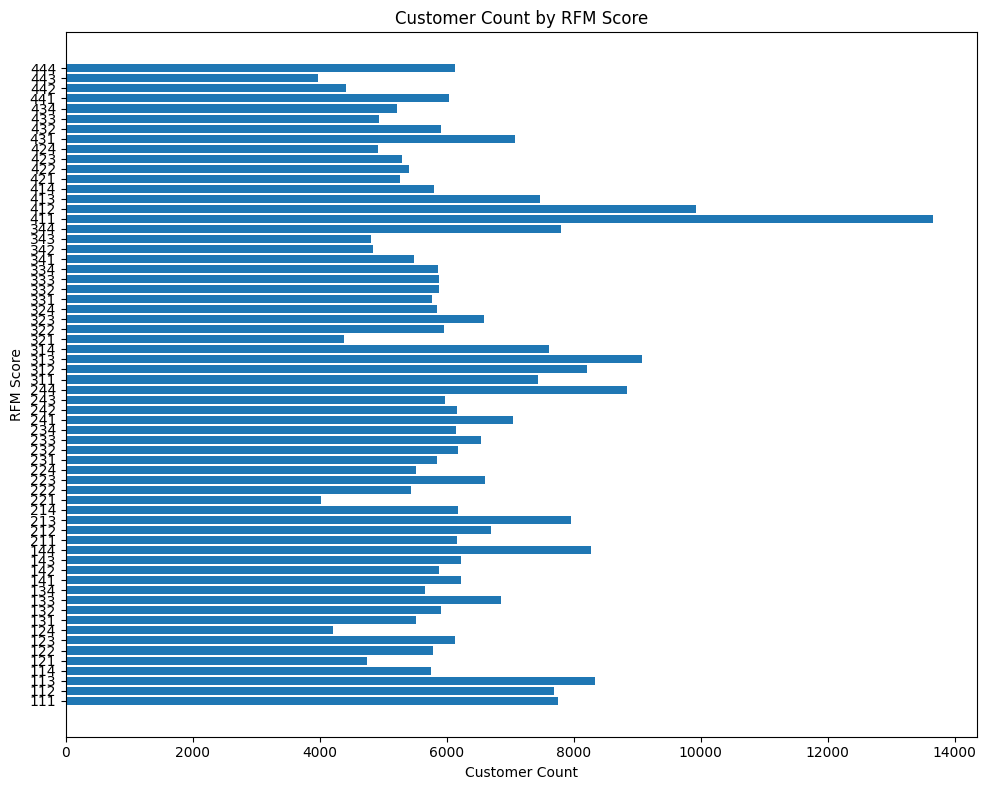

In [53]:
# Sort the summary by RFM score in ascending order
rfm_summary = rfm_summary.sort_values('RFM Score')

# Generate the horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(rfm_summary['RFM Score'], rfm_summary['CustomerID'])
plt.xlabel('Customer Count')
plt.ylabel('RFM Score')
plt.title('Customer Count by RFM Score')
plt.tight_layout()

# Display the plot
plt.show()

In [54]:
# Sort the summary by customer count in descending order
rfm_summary_sorted = rfm_summary.sort_values('CustomerID', ascending=False)

# Get the top 3 RFM scores by customer count
top_3_rfm_scores = rfm_summary_sorted.head(3)

# Get the lowest 3 RFM scores
lowest_3_rfm_scores = rfm_summary_sorted.tail(3)

# Display the top 3 and lowest 3 RFM scores
print("Top 3 RFM Scores by Customer Count:")
print(top_3_rfm_scores[['RFM Score', 'CustomerID']])

print("\nLowest 3 RFM Scores by Customer Count:")
print(lowest_3_rfm_scores[['RFM Score', 'CustomerID']])

Top 3 RFM Scores by Customer Count:
   RFM Score  CustomerID
48       411       13659
49       412        9916
34       313        9070

Lowest 3 RFM Scores by Customer Count:
   RFM Score  CustomerID
7        124        4214
20       221        4024
62       443        3969


In [55]:
# Top 3 scores show that although total spending isn't high, there is high engagement and recency amongst customers.

K-Means Clustering

In [56]:
from sklearn.cluster import KMeans

In [57]:
# Extract the RFM scores as a separate array
rfm_scores = df2['RFM Score'].values.reshape(-1, 1)

# Choose the number of clusters
k = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(rfm_scores)

# Retrieve the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [58]:
rfm_scores.shape

(404909, 1)

In [59]:
# Add the cluster labels to the DataFrame
df2['Cluster'] = cluster_labels

# Display the resulting DataFrame
print(df2[['RFM Score', 'Cluster']])

       RFM Score  Cluster
0            113        3
1            114        3
2            114        3
3            114        3
4            114        3
...          ...      ...
541904       412        1
541905       413        1
541906       413        1
541907       413        1
541908       413        1

[404909 rows x 2 columns]


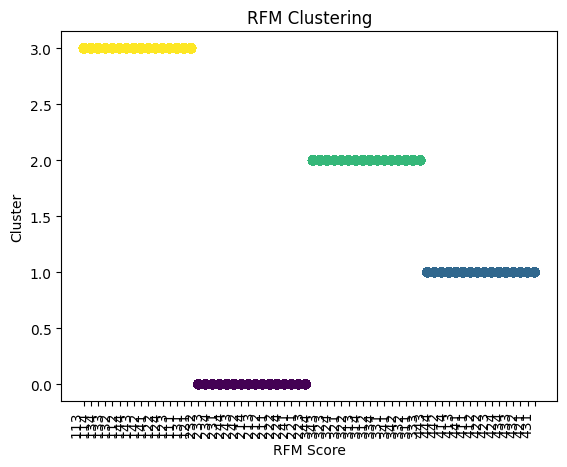

In [60]:
# Scatter plot of RFM scores colored by cluster labels
plt.scatter(df2['RFM Score'], df2['Cluster'], c=df2['Cluster'], cmap='viridis')
plt.xlabel('RFM Score')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Cluster')
plt.title('RFM Clustering')
plt.show()

In [61]:
# Group the data by cluster and calculate the summary statistics
cluster_summary = df2.groupby('Cluster').agg({
    'recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

# Display the summary DataFrame
print(cluster_summary)

   Cluster     recency  Frequency   Monetary
0        0  188.182384  22.589078  21.535231
1        1   23.001075  21.539307  17.697697
2        2   84.472052  21.761173  21.661517
3        3  310.385179  20.914505  20.971786


In [62]:
for cluster in df2['Cluster'].unique():
    # Filter the data for the current cluster
    cluster_data = df2[df2['Cluster'] == cluster]
    # Get the unique RFM scores for the current cluster
    unique_rfm_scores = cluster_data['RFM Score'].unique()
    # Display the unique RFM scores for the current cluster
    print(f"Cluster {cluster} Unique RFM Scores:")
    print(unique_rfm_scores)
    print()

Cluster 3 Unique RFM Scores:
['113' '114' '134' '133' '132' '112' '144' '143' '142' '141' '122' '124'
 '123' '111' '131' '121']

Cluster 0 Unique RFM Scores:
['232' '233' '234' '231' '244' '243' '242' '214' '213' '212' '211' '222'
 '224' '241' '221' '223']

Cluster 2 Unique RFM Scores:
['344' '343' '323' '324' '321' '322' '313' '314' '312' '334' '331' '341'
 '342' '332' '311' '333']

Cluster 1 Unique RFM Scores:
['443' '444' '442' '414' '413' '441' '411' '412' '422' '423' '424' '434'
 '433' '432' '421' '431']



Based on these results, **cluster 3** stands out with the lowest recency value, indicating recent purchases, and a relatively high frequency value. However, it has a lower monetary value compared to other clusters.
**Cluster 0** has relatively high values across all three dimensions, suggesting high recency, frequency, and monetary value.
**Cluster 2** has the highest recency value and relatively lower monetary value which would suggest the least profitable segment of customers.
**Cluster 1** falls in between with moderate values for all three dimensions.

In [63]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year_month,recency,Frequency,Monetary,R,F,M,RFM Score,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,373,1.0,15.30,1,1,3,113,3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,373,1.0,20.34,1,1,4,114,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,373,1.0,22.00,1,1,4,114,3
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,373,1.0,20.34,1,1,4,114,3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,373,1.0,20.34,1,1,4,114,3


In [64]:
df2.to_csv('cleaned_onlineretail_data.csv', index=False)